In [44]:
# do it Sequential https://www.tensorflow.org/tutorials/quickstart/beginner
# Structure https://github.com/aymericdamien/TensorFlow-Examples/blob/master/tensorflow_v2/notebooks/3_NeuralNetworks/neural_network.ipynb
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt

# use tf's mnist
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()


## Functions we will use through out this project.
1. Normalize(data), normalize the features
2. preprocessY(labels), convert a scalar into one-hot endocing

3. tf_NeuralNetwork(n_neurons, dropout=1), call tensorflow seuqntial which is a pre-packaged function that easy to build a neural network. See detail: https://www.tensorflow.org/tutorials/quickstart/beginner


4. noisyY(labels, noise_ratio): randomize a scalar into a different number to create noisy. where noise_ratio control how impure the dataset can be. Somenotes, suppose we have 10000 datapoints, with a noise_ratio 50% we may get a statsically 4500 radomnized datapoints. Since the value 3 maybe ramdomize to any intger from 0 to 9, 10% randomize to itself.

In [45]:
# Normalize the data
def normalize(data):
  # get mean and std.
  mean = np.mean(data, axis=0)
  std_dev = np.std(data, axis=0)

  # reenforce the division not 0
  std_dev[std_dev == 0] = 1

  #  x = (x-mean) / std
  data = (data - mean) / std_dev
  return data

# Convert labels to one-hot encoding https://www.tensorflow.org/api_docs/python/tf/one_hot
def preprocessY(labels):
  return tf.one_hot(labels, depth=10)

# build model
def tf_NeuralNetwork(n_neurons, dropout=1):
  model = tf.keras.models.Sequential([
      Flatten(input_shape=(784,)), # match with reshaped datapints dimension
      Dense(n_neurons, activation='relu', kernel_initializer='he_normal'), # first layer with A = rele(Z), use "he weight initial"
      Dropout(dropout),
      Dense(10, activation='softmax')
  ])
  return model

# randomize the targets
def noisyY(labels, noise_ratio):
  label_copy = labels.copy()  # it is nessary to modify on a copy dataset, other wise this function modifeys the orginal targets too
  num_noisy = int(len(labels) * noise_ratio)
  noisy_indices = np.random.choice(len(labels), num_noisy, replace=False) #generate an array with unique elements, replace=false ensure uniqueness. if you use randomint, there might be duplicate element

  for i in noisy_indices:
      label_copy[i] = np.random.randint(0, 10)
  #label_copy[0] = 10
  return label_copy



## Select 10k examples (1000 from each class) to speed up training

In [46]:
reduced_train_index = []
for i in range(10):
  selected_sample = np.where(y_train == i)[0][:1000] # np.where get the indexes if the value matches, only select first 1000 samples
  reduced_train_index.extend(selected_sample) # append

reduced_train_index = np.array(reduced_train_index)
np.random.shuffle(reduced_train_index)

x_train = x_train[reduced_train_index] # only select the datapoints from a certain selected index
y_train = y_train[reduced_train_index]

# print(reduced_train_index)
# print(y_train)

## Since we will convert the target datapoints into one-hot encoding, It is codingly easier to first noislize the targets(its scalar at this moment) before we convert it to onehot(vector). save the nosiedY for problem3.

In [47]:
# add noise to the labels 50% noise_ratio can get statistically 4500 randomized.

y_train_noisy = noisyY(y_train, noise_ratio=0.5) #randomizing
#print("before one-hot encoding noisey", y_train_noisy)
y_train_noisy = preprocessY(y_train_noisy) # one hot encoding

# print("Noised: \n", y_train_noisy)
# print("\n orignal",y_train)
# len(y_train_noisy)

In [48]:
# x_train.shape
# x_train.reshape(-1, 784).shape
# y_train.shape

## preprocess with normalizing x_train features and one-hot encoding for targe

In [49]:
# Flatten both train and test, then normalize
x_train = x_train.reshape(-1, 784)
x_train = normalize(x_train)

x_test = x_test.reshape(-1, 784)
x_test = normalize(x_test)

# one hot encoding
y_train = preprocessY(y_train)
y_test = preprocessY(y_test)

In [50]:
# print(y_train[0])
# y_train.shape

## train on original dataset(tracked history in a messy way)

In [51]:
# # Parameters
# width_k = [1, 5, 15, 35]
# dropout_p = [0.9, 0.75, 0.5, 0]
# epoch = 80
# batch_size = 100


# # Training models and storing final results (original dataset)
# train_result = []  # To store training accuracies
# val_result = []    # To store validation accuracies

# for p in dropout_p:
#   kth_train = []
#   kth_val = []
#   for k in width_k:

#     model = tf_NeuralNetwork(n_neurons=k, dropout=p) # it Build the model with a 2layer neural network tensor sequential

#     model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])#initialize the complier

#     # train the model and store in the history. It contain key loss, accuracy, val
#     history = model.fit(x_train, y_train, epochs=epoch, batch_size=batch_size, validation_data=(x_test, y_test), verbose=0)


#     # Get the final training and validation accuracy
#     final_train_acc = history.history['accuracy'][-1]
#     final_val_acc = history.history['val_accuracy'][-1]

#     # Store the results
#     kth_train.append(final_train_acc)
#     kth_val.append(final_val_acc)

#     print(k, p, "_th training done")

#   # Store the results for each dropout rate
#   train_result.append(kth_train)
#   val_result.append(kth_val)

#   print(p, ": all k training done")



In [52]:
# print(type(history.history))
# print(history.history.keys())
# len(history.history["loss"])

In [53]:
# for i, p in enumerate(dropout_p):
#     plt.plot(width_k, train_result[i], label="p =" +str(p))

# plt.xlabel('n_neurons')
# plt.ylabel('Training Acc')
# plt.title('Training Accuracy vs #neurons with difference dropout(Original Dataset)')
# plt.legend()
# plt.show()


# for i, p in enumerate(dropout_p):
#     plt.plot(width_k, val_result[i], label="p =" +str(p))

# plt.xlabel('n_neurons')
# plt.ylabel('test Acc')
# plt.title('Testg Accuracy vs #neurons with difference dropout(Original Dataset)')
# plt.legend()
# plt.show()

## Implementations to train with original dataset

In [54]:
# Parameters
width_k = [1, 5, 15, 35]
dropout_p = [0.9, 0.75, 0.5, 0]
epoch = 80
batch_size = 100

# Training models and storing final results in a list of dictionaries (original dataset)
results = []

for p in dropout_p:
  kth_train = []
  kth_val = []
  for k in width_k:
    model = tf_NeuralNetwork(n_neurons=k, dropout=p) # it create a 2layer neural network tensor sequential

    model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy']) #initialize the complier

    history = model.fit(x_train, y_train, epochs=epoch, batch_size=batch_size, validation_data=(x_test, y_test), verbose=0)

    final_train_acc = history.history['accuracy'][-1]

    final_val_acc = history.history['val_accuracy'][-1]

    #save as dictionary easy to extract
    results.append({'k': k, 'p': p, 'train_acc': final_train_acc, 'val_acc': final_val_acc})

    print(p, k, " th training done")




/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


0.9 1  th training done
0.9 5  th training done
0.9 15  th training done
0.9 35  th training done
0.75 1  th training done
0.75 5  th training done
0.75 15  th training done
0.75 35  th training done
0.5 1  th training done
0.5 5  th training done
0.5 15  th training done
0.5 35  th training done
0 1  th training done
0 5  th training done
0 15  th training done
0 35  th training done


## Orignal dataset plot


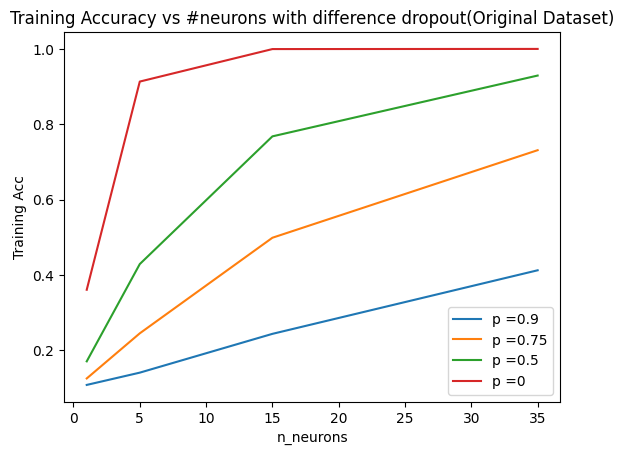

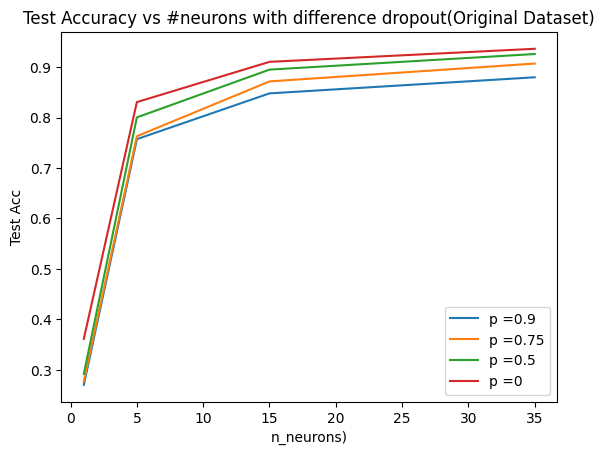

In [55]:
# Plot training accuracy
for p in dropout_p:
  train_accuracies = [result['train_acc'] for result in results if result['p'] == p]
  plt.plot(width_k, train_accuracies, label="p =" +str(p))

plt.xlabel('n_neurons')
plt.ylabel('Training Acc')
plt.title('Training Accuracy vs #neurons with difference dropout(Original Dataset)')
plt.legend()
plt.show()


# Plot test accuracy
for p in dropout_p:
  test_accuracies = [result['val_acc'] for result in results if result['p'] == p]
  plt.plot(width_k, test_accuracies, label="p =" +str(p))

plt.xlabel('n_neurons)')
plt.ylabel('Test Acc')
plt.title('Test Accuracy vs #neurons with difference dropout(Original Dataset)')
plt.legend()
plt.show()

## Noislized Y targeet. Based on the result, the final accuracy is interesting. We will track the losses on each epochs too


In [56]:
# Training models and storing final results (noisy dataset)
noisy_results = []
noisy_fit_results = []
for p in dropout_p:
  for k in width_k:
    model = tf_NeuralNetwork(n_neurons=k, dropout=p)

    model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

    history = model.fit(x_train, y_train_noisy, epochs=epoch, batch_size=batch_size, validation_data=(x_test, y_test), verbose=0)


    # Track the loss on each epoch
    fit_train_acc = history.history['accuracy']
    fit_val_acc = history.history['val_accuracy']
    fit_loss = history.history['loss']
    noisy_fit_results.append({'k': k, 'p': p, 'fit_train__acc': fit_train_acc, 'fit_val_acc': fit_val_acc,'fit_loss': fit_loss})

    # Track the final result
    final_train_acc = history.history['accuracy'][-1]
    final_val_acc = history.history['val_accuracy'][-1]
    noisy_results.append({'k': k, 'p': p, 'train_acc': final_train_acc, 'val_acc': final_val_acc})

    print(p, k, " th training done")


0.9 1  th training done
0.9 5  th training done
0.9 15  th training done
0.9 35  th training done
0.75 1  th training done
0.75 5  th training done
0.75 15  th training done
0.75 35  th training done
0.5 1  th training done
0.5 5  th training done
0.5 15  th training done
0.5 35  th training done
0 1  th training done
0 5  th training done
0 15  th training done
0 35  th training done


## Noisy dataset plot

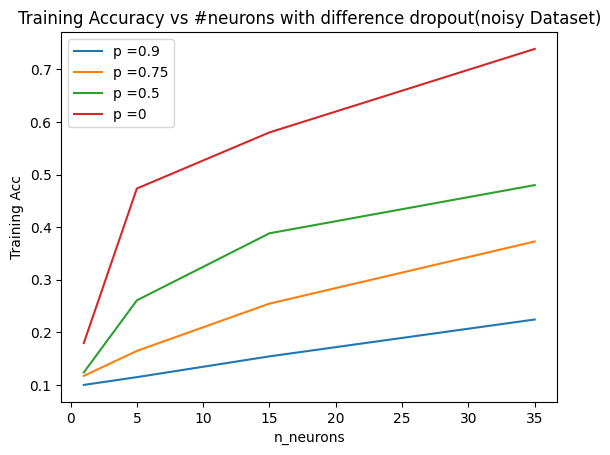

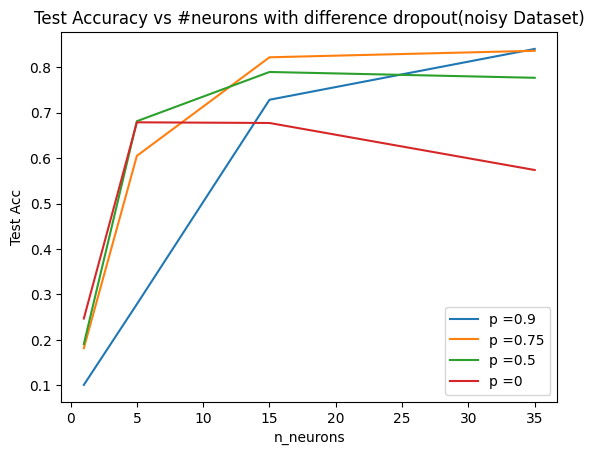

In [57]:
# Plot training accuracy
for p in dropout_p:
  train_accuracies = [result['train_acc'] for result in noisy_results if result['p'] == p]
  plt.plot(width_k, train_accuracies, label="p =" +str(p))

plt.xlabel('n_neurons')
plt.ylabel('Training Acc')
plt.title('Training Accuracy vs #neurons with difference dropout(noisy Dataset)')
plt.legend()
plt.show()


# Plot test accuracy
for p in dropout_p:
  test_accuracies = [result['val_acc'] for result in noisy_results if result['p'] == p]
  plt.plot(width_k, test_accuracies, label="p =" +str(p))

plt.xlabel('n_neurons')
plt.ylabel('Test Acc')
plt.title('Test Accuracy vs #neurons with difference dropout(noisy Dataset)')
plt.legend()
plt.show()

## Epoch loss

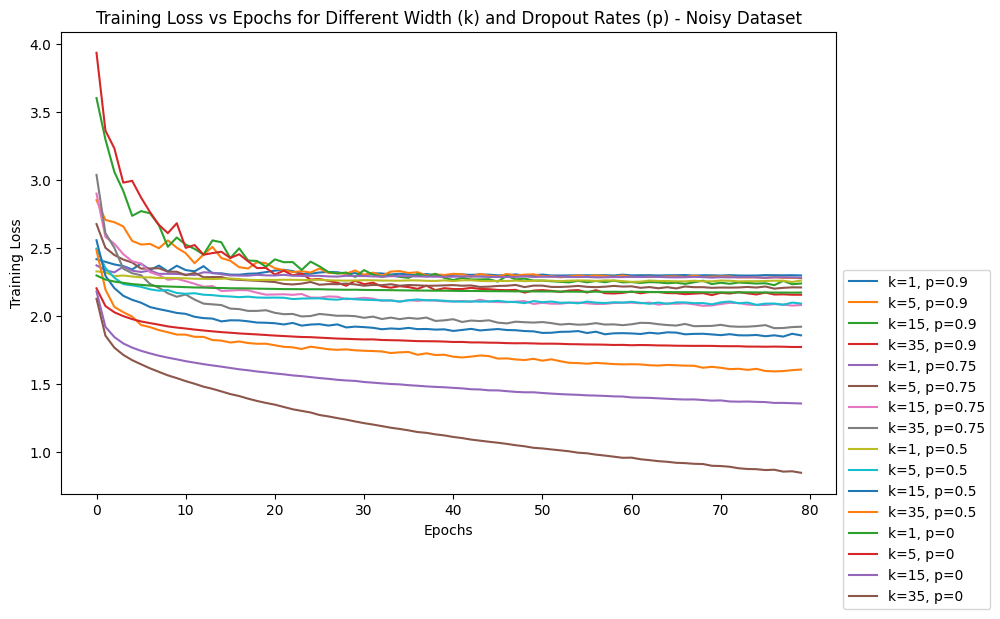

In [58]:
# Plot training loss over epochs for noisy dataset
plt.figure(figsize=(10, 6))
for result in noisy_fit_results:
    plt.plot(range(epoch), result['fit_loss'], label=f"k={result['k']}, p={result['p']}")

plt.xlabel('Epochs')
plt.ylabel('Training Loss')
plt.title('Training Loss vs Epochs for Different Width (k) and Dropout Rates (p) - Noisy Dataset')
plt.legend(bbox_to_anchor=(1, 0.5))
plt.show()

## Comment on the differences between Step 2 and Step 3. How does noise change things? For which setup dropout is more useful?


**On the orginal dataset**

On training plot, we observe that the accuracy increases as both the number of neurons (k) and dropout rate (p) increase. Training with a dropout rate of p = 0 (no neurons are turned off, all neurons are used) and total neurons at k = 35 yields the highest training accuracy, which is almost 100%. Referring to lecture and theory, this is a sign of overfitting. To prove that we can look at the test accuracy plot, where the accuracy for p = 0, k = 35 drops from 99.9% to 90% compared to the training accuracy.
While the accuracy for dropout p = 0.5 and 0.75 remains stable in the test accuracy plot. And dropout p = 0.5 has higher test accuracy than p =0.75. Additionally, In this case, the neural network is more sensitive to the dropout rate than to the number of neurons. This is evident because, as the number of neurons increases, the test accuracy stabilizes around approximately 0.9, indicating that the model is learning effectively without overfitting.


**On the noisy dataset**
First take look the test and train the accuracy plot for noisy dataset, the plot for p = 0 and k = 35 is eye attractive.  We see that while the training accuracy increases, the test accuracy drops significantly. This makes sense because, based on our observations from the original dataset, the model is overfitting, which implies it is very sensitive all features. Since we randomize the target to fool the model, the model try to process features with noisy labels, which results in increasing in training set and decreasing during testing.

For the rest of the models with different hyperparameter, their performance also align with the observation from the original dataset. For p=0.75 and 5, both models do not overfit and are less sensitive to individual features. This means that, even with mislabeled targets, these models are less effective at updating their weights based on incorrect data, the optimizers are regulated. For the model with p = 0.1, there isn't a significant difference in training set since this model is underfitting and not learning effectively from the training samples. However, the regulation grants the ability of anti-poison data. It accuracy increases on the test set.

For the loss over epochs, All models showed a decreasing in loss, with the k=35, p=0 which is the most overfitting model stands out in the training set on minimizing the loss. In general,the lower in p the lower in loss which aligns with previous observations. Models with more neurons turned on are more sensitive to features.
optimal for handling the noisy data.

**Conclusion**
The accuracy of the models is more sensitive on dropout rate than to the number of neurons. This sensitivity is critical especially when the dataset is noisy or not very clean. When the dropout rate is very high (i.e., not turning off at least 5% of the neurons), even a small portion of mislabeled data can be lethal to the model's performance. I believe that a dropout rate of p = 0.75 balance between bias and variances. If you are unsure about the integrity of your dataset (e.g., if the dataset contains noise), using a dropout rate of p = 0.5 could be a good choice to ensure the model's generalization and avoid overfitting.
